In [ ]:
%pip install servicestack
%pip install matplotlib
%pip install pandas

""" Options:
Date: 2021-07-27 06:02:05
Version: 5.111
Tip: To override a DTO option, remove "//" prefix before updating
BaseUrl: https://covid-vac-watch.netcore.io

#GlobalNamespace: 
#MakePropertiesOptional: False
#AddServiceStackTypes: True
#AddResponseStatus: False
#AddImplicitVersion: 
#AddDescriptionAsComments: True
IncludeTypes: QueryVaccinationRates.*
#ExcludeTypes: 
#DefaultImports: datetime,decimal,marshmallow.fields:*,servicestack:*,typing:*,dataclasses:dataclass/field,dataclasses_json:dataclass_json/LetterCase/Undefined/config,enum:Enum/IntEnum
#DataClass: 
#DataClassJson: 
"""

import datetime
import decimal
from marshmallow.fields import *
from servicestack import *
from typing import *
from dataclasses import dataclass, field
from dataclasses_json import dataclass_json, LetterCase, Undefined, config
from enum import Enum, IntEnum

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd


@dataclass_json(letter_case=LetterCase.CAMEL, undefined=Undefined.EXCLUDE)
@dataclass
class VaccinationData:
    id: int = 0
    date: datetime.datetime = datetime.datetime(1, 1, 1)
    location: Optional[str] = None
    total_vaccinations: Optional[Decimal] = None
    total_distributed: Optional[Decimal] = None
    people_vaccinated: Optional[Decimal] = None
    people_fully_vaccinated_per_hundred: Optional[Decimal] = None
    total_vaccinations_per_hundred: Optional[Decimal] = None
    people_fully_vaccinated: Optional[Decimal] = None
    people_vaccinated_per_hundred: Optional[Decimal] = None
    distributed_per_hundred: Optional[Decimal] = None
    daily_vaccinations_raw: Optional[Decimal] = None
    daily_vaccinations: Optional[Decimal] = None
    daily_vaccinations_per_million: Optional[Decimal] = None
    share_doses_used: Optional[Decimal] = None


# @Route("/vaccination_rates")
@dataclass_json(letter_case=LetterCase.CAMEL, undefined=Undefined.EXCLUDE)
@dataclass
class QueryVaccinationRates(QueryDb[VaccinationData], IReturn[QueryResponse[VaccinationData]]):
    location: Optional[str] = None



from IPython.core.display import display, HTML

client = JsonServiceClient("https://covid-vac-watch.netcore.io")


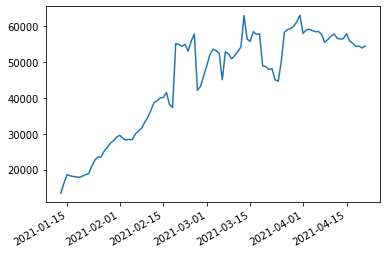

In [3]:
response: QueryResponse[VaccinationData] = client.get(QueryVaccinationRates(
    location="Arizona"
))
df = pd.DataFrame(response.results)
plt.plot(df.date, df.daily_vaccinations)
plt.gcf().autofmt_xdate()
plt.show()

In [4]:
printtable(response.results[0:10],
           headers=["id","date","location","total_vaccinations", "daily_vaccinations"])


+----------------------------------------------------------------------------------+
|  id   |        date         | location | total_vaccinations | daily_vaccinations |
|----------------------------------------------------------------------------------|
| 12504 | 2021-01-12 00:00:00 | Arizona  |             141355 |                    |
| 12505 | 2021-01-13 00:00:00 | Arizona  |             154745 |              13390 |
| 12506 | 2021-01-14 00:00:00 | Arizona  |             173665 |              16155 |
| 12507 | 2021-01-15 00:00:00 | Arizona  |             197086 |              18577 |
| 12508 | 2021-01-16 00:00:00 | Arizona  |                    |              18257 |
| 12509 | 2021-01-17 00:00:00 | Arizona  |                    |              18065 |
| 12510 | 2021-01-18 00:00:00 | Arizona  |                    |              17937 |
| 12511 | 2021-01-19 00:00:00 | Arizona  |             266276 |              17846 |
| 12512 | 2021-01-20 00:00:00 | Arizona  |             281887 |  

In [3]:
display(HTML(htmldump(response)))
